#  Коэффициент естественной и искуственной сепарации по VBA

без документации, без исходных источников, без колес - пользоваться только в крайнем случае

In [8]:
import sys
sys.path.append('../')
import uPVT.PVT as PVT
import uPVT.PVT_correlations as PVTcorr
import Marquez_VBA as VBA
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np

Чтение данных, посчитанных с UniflocVBA 7.4

In [2]:
data = pd.read_excel('SepTestData.xlsx')

Исходные данные, одинаковы и для python, и для vba

In [3]:
pintake_atm=80
wct_perc=22
tintake_c=80
dintake_mm=100
dcasing_mm=125
gammagas=0.9
gammaoil=0.75
gammawater=1
rsb_m3m3=80
rp_m3m3=80
pb_atm=150
tres_c=120
bob_m3m3=1
sepgassep=0.50

Задание PVT свойств по Стендингу, необходимых для расчета

В объекте класса Marquez_separation_VBA нужно задавать все свойства жидкости и скважины

In [4]:
fluid=PVT.FluidStanding(gammaoil,gammagas,gammawater,rsb_m3m3)
fluid.calc(pintake_atm,tintake_c)
object_sep = VBA.Marquez_separation_VBA()
object_sep.gamma_gas = gammagas
object_sep.gamma_oil = gammaoil
object_sep.gamma_water = gammawater
object_sep.rsb_m3m3 = rsb_m3m3
object_sep.rp_m3m3 = rp_m3m3
object_sep.pb_atm = pb_atm
object_sep.bo_m3m3 = fluid.bo_m3m3
object_sep.bg_m3m3 = fluid.bg_m3m3
object_sep.rho_oil_stkgm3 = fluid.rho_oil_stkgm3
object_sep.rho_gas_sckgm3 = fluid.rho_gas_sckgm3
object_sep.wct_perc = wct_perc

Вывод посчитанных значений PVT

In [5]:
def out(number,string):
    space=' - '
    print(str(number),space,string)
out(dintake_mm,'dintake_mm')
out(dcasing_mm,'dcasing_mm')
out(fluid.bo_m3m3,'bo_m3m3')
out(fluid.bg_m3m3,'bg_m3m3')
out(fluid.sigma_oil_Nm,'sigma_oil_Nm')
out(fluid.rho_oil_stkgm3,'rho_oil_stkgm3')
out(fluid.rho_gas_sckgm3,'rho_gas_sckgm3')
out(wct_perc,'wct_perc')

100  -  dintake_mm
125  -  dcasing_mm
1.9522964869459403  -  bo_m3m3
0.012673883940723262  -  bg_m3m3
0.0  -  sigma_oil_Nm
750.0  -  rho_oil_stkgm3
1.1025  -  rho_gas_sckgm3
22  -  wct_perc


Генерация зависимостей коэффицента общей и естесственной сепарации от дебита, посчитанных через UniflocVBA и UniflocPy

In [6]:
def getvalues(object_sep, start=1,stop=300,step=10):
    q=[]
    sep=[]
    totalsep=[]
    for i in range(start,stop,step):
        q.append(i)
        object_sep.ql_scm3day = i
        natsep=object_sep.calc_natural_separation()
        sep.append(natsep)
        totalsep.append(object_sep.calc_total_separation())
      
    return [q,sep,totalsep]
object_sep.surface_tension_method = 0
result_BS=getvalues(object_sep)
object_sep.surface_tension_method = 1
result_AM=getvalues(object_sep)
object_sep.surface_tension_method = 2
result_hand=getvalues(object_sep)

Построение графиков

***Существует явное несовпадение графиков, а также неопределенность в определении поверхностного натяжения  - sigma_o***

необходима доработка

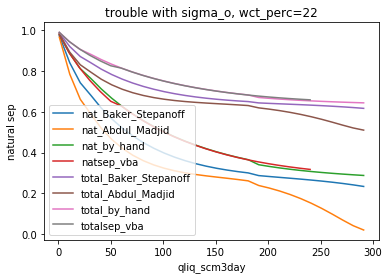

In [7]:
plt.plot(result_BS[0],result_BS[1],label='nat_Baker_Stepanoff')
plt.plot(result_AM[0],result_AM[1],label='nat_Abdul_Madjid')
plt.plot(result_hand[0],result_hand[1],label='nat_by_hand')
plt.plot(data['Q'],data['Естественная сепарация 100 мм'],label='natsep_vba')

plt.plot(result_BS[0],result_BS[2],label='total_Baker_Stepanoff')
plt.plot(result_AM[0],result_AM[2],label='total_Abdul_Madjid')
plt.plot(result_hand[0],result_hand[2],label='total_by_hand')
plt.plot(data['Q'],data['Общая сепарация'],label='totalsep_vba')

plt.ylabel('natural sep')
plt.xlabel('qliq_scm3day')
plt.title('trouble with sigma_o, wct_perc=22')
plt.legend()
plt.show()